In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Exercise 6.1

Show empirically that the information limit of 2 prediction bits per parameter also holds for nearest neighbors.

In [30]:
# Load binary classification dataset
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Describe the data: number of samples, number of features, what the features are, and the classes
print(X.shape)
print(f"Features: {dataset.feature_names}")
print(f"Classes: {dataset.target_names}")

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))

(569, 30)
Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Classes: ['malignant' 'benign']
0.956140350877193


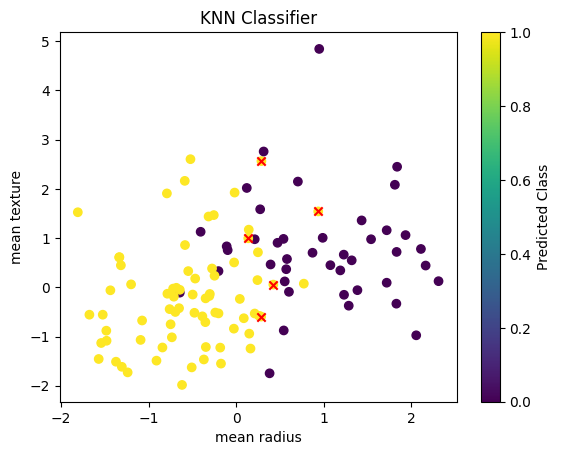

In [39]:
# Plot the results using the predicted labels as colors. Label misclassified points with red Xs.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
plt.scatter(X_test[y_pred != y_test, 0], X_test[y_pred != y_test, 1], c='r', marker='x')
plt.xlabel(dataset.feature_names[0])
plt.ylabel(dataset.feature_names[1])
plt.title('KNN Classifier')
plt.colorbar(label='Predicted Class')
plt.show()
